In [661]:
import numpy as np
from scipy.stats import unitary_group, special_ortho_group,ortho_group
import matplotlib.pyplot as plt
import scipy

In [662]:
def complex_torus(n):
    diagonal = [np.exp(np.random.uniform(0,2*np.pi)*1j) for i in range(n)]
    torus = np.diag(diagonal)
    return torus

def phi_action(D, U, A):
    U1 = scipy.linalg.schur(U@A, 'complex')[1] #SCHUR
    S = scipy.linalg.schur(U@A, 'complex')[0]
    return U1 @ D @ S @ np.linalg.inv(U1)

def psi_action(D,V):
    return V@D

def det_of_k_dim_flag(A,V,k):
    n = len(A)
    M = A @ V
    X = M[:,0:k]
    return np.sqrt(np.abs(np.linalg.det(X.T @ X)))

def sum_of_top_k_evals(M,k):
    evals = np.abs(np.linalg.eig(M)[0])
    return np.prod(np.sort(evals)[-k:])

In [663]:
A = np.diag([5,3,1])
evals = np.abs(np.linalg.eig(A)[0])
np.sort(evals)[-1:]

array([5.])

In [664]:
np.sort(evals)

array([1., 3., 5.])

# Toral invariance of spectra

(i.e. invariance of spectra under applications of phi)

In [665]:
# over unitary group
U = unitary_group.rvs(3)
A = np.diag([5,2,1/10])
n = len(A)
for i in range(10):
    D = complex_torus(n)
    l1 = np.max(np.abs(np.linalg.eig(phi_action(D, U,A))[0]))
    print(l1)

1.4478719883723543
1.4478719883723499
1.4478719883723545
1.4478719883723519
1.4478719883723519
1.4478719883723545
1.447871988372352
1.4478719883723514
1.4478719883723536
1.447871988372353


In [666]:
# over orthogonal group
U = ortho_group.rvs(3)
A = np.diag([5,2,1/10])
n = len(A)
for i in range(10):
    D = complex_torus(n)
    l1 = np.max(np.abs(np.linalg.eig(phi_action(D, U,A))[0]))
    print(l1)

4.64533051485348
4.645330514853484
4.6453305148534865
4.645330514853488
4.645330514853483
4.645330514853485
4.645330514853484
4.645330514853489
4.64533051485349
4.6453305148534865


# Toral invariance of det

In [667]:
# over ortho_group k = 1
U = ortho_group.rvs(3)
A = np.diag([5,2,1/10])
V = scipy.linalg.schur(U@A, 'complex')[1]
S = scipy.linalg.schur(U@A, 'complex')[0]
n = len(A)
k = 1
for i in range(10):
    D = complex_torus(n)
    l1 = np.linalg.norm(det_of_k_dim_flag(A,V@D,k))
    print(l1)

0.16000220682471594
0.16000220682471594
0.16000220682471594
0.16000220682471594
0.16000220682471594
0.16000220682471597
0.16000220682471594
0.16000220682471594
0.16000220682471594
0.16000220682471594


In [668]:
# over ortho_group k = 2
U = ortho_group.rvs(3)
A = np.diag([5,2,1/10])
V = scipy.linalg.schur(U@A)[1]
S = scipy.linalg.schur(U@A)[0]
n = len(A)
k = 2
for i in range(10):
    D = complex_torus(n)
    l1 = np.linalg.norm(det_of_k_dim_flag(A,V@D,k))
    print(l1)

6.110480753714159
6.1104807537141586
6.110480753714159
6.110480753714159
6.110480753714159
6.1104807537141586
6.1104807537141586
6.11048075371416
6.110480753714161
6.110480753714159


In [669]:
# over unitary_group k = 1
U = unitary_group.rvs(3)
A = np.diag([5,2,1/10])
V = scipy.linalg.schur(U@A, 'complex')[1]
S = scipy.linalg.schur(U@A, 'complex')[0]
n = len(A)
k = 1
for i in range(10):
    D = complex_torus(n)
    l1 = np.linalg.norm(det_of_k_dim_flag(A,V@D,k))
    print(l1)

2.7411321611376613
2.7411321611376613
2.741132161137662
2.7411321611376613
2.7411321611376613
2.741132161137661
2.741132161137662
2.7411321611376622
2.741132161137661
2.7411321611376613


In [670]:
# over unitary_group k = 2
U = unitary_group.rvs(3)
A = np.diag([5,2,1/10])
V = scipy.linalg.schur(U@A, 'complex')[1]
S = scipy.linalg.schur(U@A, 'complex')[0]
n = len(A)
k = 2
for i in range(10):
    D = complex_torus(n)
    l1 = np.linalg.norm(det_of_k_dim_flag(A,V@D,k))
    print(l1)

7.0724428654776235
7.072442865477625
7.07244286547762
7.072442865477625
7.072442865477623
7.0724428654776235
7.072442865477623
7.072442865477621
7.072442865477623
7.072442865477623


# Inequality is true over toral fibers.

In [671]:
U = ortho_group.rvs(3)
A = np.diag([5,2,1/10])
V = scipy.linalg.schur(U@A, output = "complex")[1]
S = scipy.linalg.schur(U@A, output = "complex")[0]
n = len(A)
k = 1
for i in range(10):
    D = complex_torus(n)
    LHS = np.max(np.abs(np.linalg.eig(phi_action(D, U,A))[0]))
    RHS = np.linalg.norm(det_of_k_dim_flag(A,V@D,k))
    print(np.round(LHS,4) >= np.round(RHS,4))

True
True
True
True
True
True
True
True
True
True


In [757]:
U = ortho_group.rvs(4)
A = np.diag([5,2,1,1/10])
V = scipy.linalg.schur(U@A, output = "complex")[1]
S = scipy.linalg.schur(U@A, output = "complex")[0]
n = len(A)
k = 3
for i in range(10):
    D = complex_torus(n)
    LHS = sum_of_top_k_evals(U@A,k)
    RHS = np.linalg.norm(det_of_k_dim_flag(A,V@D,k))
    print(np.round(LHS,4) >= np.round(RHS,4))

True
True
True
True
True
True
True
True
True
True


In [673]:
LHS

1.5530710849786333

In [674]:
RHS


1.0971747839573256

# Check if toral action of phi is uniform on UA

In [775]:
U = special_ortho_group.rvs(4)
A = np.diag([14,3,2,1])
V = scipy.linalg.schur(U@A, output = "complex")[1]
S = scipy.linalg.schur(U@A, output = "complex")[0]

for i in range(100000):
    D = complex_torus(n)
    LHS = sum_of_top_k_evals(U@A,k)
    RHS = np.linalg.norm(det_of_k_dim_flag(A,V@D,k))
    V = scipy.linalg.schur(U@A, 'complex')[1]
    S = scipy.linalg.schur(U@A, 'complex')[0]
    Z, Sigma, W = np.linalg.svd(U@A)
    matrices.append(V@np.conj(W.T)@V@D@Z)

In [776]:
dist1 = [M[0,0] for M in matrices]
dist2 = [unitary_group.rvs(4)[0,0] for d in dist1]

In [777]:
x1 = [d.real for d in dist1]
y1 = [d.imag for d in dist1]
x2 = [d.real for d in dist2]
y2 = [d.imag for d in dist2]

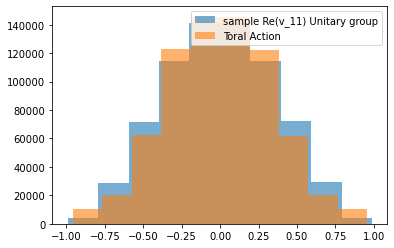

In [778]:
plt.hist(x2,alpha = 0.6, label = "sample Re(v_11) Unitary group")
plt.hist(x1,alpha = 0.6, label = "Toral Action")
plt.legend()